In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from warnings import filterwarnings
filterwarnings('ignore')


# Load and Explore Dataset

In [2]:
# Load dataset
df = pd.read_excel(f'./GDM_Dataset.xlsx')
# View the first 10 rows
df.head(10)

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,UID,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Risk Factors,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
1,1,20324,7,30,101.008592,178,31.88,Yes,GBR,NaN,...,44.8,No,No,5,Female,NO,5,8,10,2016/04
2,2,19260,6,29,91.014089,173,30.41,Yes,OTH,NaN,...,19.7,No,No,3,Male,NO,9,10,10,2017/02
3,3,5627,2,22,65.395008,168,23.17,No,GBR,NaN,...,75.8,No,No,0,Female,NO,NaN,NaN,NaN,2018/05
4,4,9639,3,31,49.997,170,17.3,No,WEU,NaN,...,79,No,No,1,Female,NO,9,10,10,2017/09
5,5,16095,5,24,54.300537,171,18.57,No,GBR,NaN,...,66.1,No,No,0,Female,NO,9,10,10,2016/08
6,6,19698,6,36,58.996575,165,21.67,No,ASE,NaN,...,65.6,No,No,2,Female,NO,10,10,10,2016/11
7,7,19713,7,39,50.001609,161,19.29,No,GBR,NaN,...,18.7,No,No,1,Female,NO,NaN,NaN,NaN,2017/08
8,8,3797,2,31,66.996558,153,28.62,No,CAR,NaN,...,29.5,No,Yes,3,Female,NO,9,NaN,NaN,2017/04
9,9,8467,3,28,53.806896,156,22.11,No,OTH,NaN,...,0.4,No,Yes,6,Female,NO,NaN,NaN,NaN,2017/01


In [3]:
# Get the columns names
df_columns = df.iloc[0]

# Remove the first row
df = df.iloc[1:]

# Reset the index
df = df.reset_index(drop=True)

# Set the columns names
df.columns = df_columns

# Drop UID (it's not a feature, it's just an identifier)
df = df.drop(columns=["UID"])

df.head(10)


,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Risk Factors,AntenatalMedicalFactors,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
0,20324,7,30,101.008592,178,31.88,Yes,GBR,NaN,Mental health,...,44.8,No,No,5,Female,NO,5,8,10,2016/04
1,19260,6,29,91.014089,173,30.41,Yes,OTH,NaN,NaN,...,19.7,No,No,3,Male,NO,9,10,10,2017/02
2,5627,2,22,65.395008,168,23.17,No,GBR,NaN,NaN,...,75.8,No,No,0,Female,NO,NaN,NaN,NaN,2018/05
3,9639,3,31,49.997,170,17.3,No,WEU,NaN,NaN,...,79,No,No,1,Female,NO,9,10,10,2017/09
4,16095,5,24,54.300537,171,18.57,No,GBR,NaN,NaN,...,66.1,No,No,0,Female,NO,9,10,10,2016/08
5,19698,6,36,58.996575,165,21.67,No,ASE,NaN,NaN,...,65.6,No,No,2,Female,NO,10,10,10,2016/11
6,19713,7,39,50.001609,161,19.29,No,GBR,NaN,NaN,...,18.7,No,No,1,Female,NO,NaN,NaN,NaN,2017/08
7,3797,2,31,66.996558,153,28.62,No,CAR,NaN,NaN,...,29.5,No,Yes,3,Female,NO,9,NaN,NaN,2017/04
8,8467,3,28,53.806896,156,22.11,No,OTH,NaN,Previous uterine surgery,...,0.4,No,Yes,6,Female,NO,NaN,NaN,NaN,2017/01
9,14695,5,20,94.00152,164,34.95,Yes,CAE,Age < 20,NaN,...,100,No,No,5,Male,NO,8,9,10,2019/02


In [4]:
# print the number of rows and columns
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  23490
Number of columns:  47


In [5]:
# Check if the dataset has null values
print("Percentage of null values:")
for key, value in df.isnull().sum().items():
    percentage = (value/df.shape[0])*100
    print(f"{key}: {percentage:.2f}%")
    

Percentage of null values:
Index of Multiple Deprivation Rank: 0.00%
IMD Decile: 0.00%
AgeAtStartOfSpell: 0.00%
WeightMeasured: 0.00%
Height: 0.00%
Body Mass Index at Booking: 0.00%
Obese?: 0.00%
Ethnicity: 0.00%
Risk Factors: 82.50%
AntenatalMedicalFactors: 77.14%
PreviousObstetricHistory: 90.04%
Parity: 0.00%
Gravida: 0.05%
Glucoselevelblood: 88.73%
GlucoseToleranceTest: 35.24%
Glucoselevel0minblood: 27.89%
Glucoselevel120minblood: 27.98%
Gestational Diabetes: 0.00%
FolicAcidDose: 30.25%
SystolicBloodPressureCuff: 58.87%
Diastolic Blood Pressure: 65.33%
VitaminDlevelblood: 87.30%
O_Thyroidfunctionblood: 100.00%
Delivery_Outcome: 0.00%
OnsetofLabourMethod: 0.31%
Contraction frequency prior to delivery: 67.38%
PrimaryIndicationforCaesarean: 69.37%
Category Caesarean Section: 69.46%
Perineal care: 0.00%
EstimatedTotalBloodLoss: 0.49%
Gestation: 0.00%
Severely Premature?: 0.00%
Gestation (Days): 0.00%
Gestation at booking (Weeks): 9.08%
No_Of_previous_Csections: 0.00%
BabyBirthWeight: 0.

What needs to be done: 

1. Drop >= 70% null columns.

2. Consider dropping or imputing 60–70% null columns, depending on their correlation with the target.

3. Impute other null columns (median for numeric, mode for categorical).

4. Keep the rest as-is.


## 1. Drop >= 70% null columns

In [6]:
# Get columns with more than 60% null values
columns_70 = []
for key, value in df.isnull().sum().items():
    if value/df.shape[0] > 0.7:
        columns_70.append(key)

# Drop columns with more than 70% null values
df = df.drop(columns_70, axis=1)
df.head(10)

,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Parity,Gravida,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
0,20324,7,30,101.008592,178,31.88,Yes,GBR,0,1,...,44.8,No,No,5,Female,NO,5,8,10,2016/04
1,19260,6,29,91.014089,173,30.41,Yes,OTH,0,1,...,19.7,No,No,3,Male,NO,9,10,10,2017/02
2,5627,2,22,65.395008,168,23.17,No,GBR,0,1,...,75.8,No,No,0,Female,NO,NaN,NaN,NaN,2018/05
3,9639,3,31,49.997,170,17.3,No,WEU,0,1,...,79,No,No,1,Female,NO,9,10,10,2017/09
4,16095,5,24,54.300537,171,18.57,No,GBR,0,1,...,66.1,No,No,0,Female,NO,9,10,10,2016/08
5,19698,6,36,58.996575,165,21.67,No,ASE,0,2,...,65.6,No,No,2,Female,NO,10,10,10,2016/11
6,19713,7,39,50.001609,161,19.29,No,GBR,0,1,...,18.7,No,No,1,Female,NO,NaN,NaN,NaN,2017/08
7,3797,2,31,66.996558,153,28.62,No,CAR,2,3,...,29.5,No,Yes,3,Female,NO,9,NaN,NaN,2017/04
8,8467,3,28,53.806896,156,22.11,No,OTH,1,2,...,0.4,No,Yes,6,Female,NO,NaN,NaN,NaN,2017/01
9,14695,5,20,94.00152,164,34.95,Yes,CAE,0,2,...,100,No,No,5,Male,NO,8,9,10,2019/02


## 2. Consider dropping or imputing 60–70% null columns

In [7]:
# Get columns with more than 60% null values
columns_60 = []
for key, value in df.isnull().sum().items():
    if value/df.shape[0] > 0.6:
        columns_60.append(key)


df_60 = df[columns_60]

# Add the target column to the 60% null columns dataframe
df_60["Gestational Diabetes"] = df["Gestational Diabetes"]
df_60.head(10)

,Diastolic Blood Pressure,Contraction frequency prior to delivery,PrimaryIndicationforCaesarean,Category Caesarean Section,Gestational Diabetes
0,NaN,NaN,NaN,NaN,No
1,NaN,NaN,NaN,NaN,No
2,89,131,NaN,NaN,No
3,NaN,3,NaN,NaN,No
4,NaN,NaN,NaN,NaN,No
5,NaN,NaN,NaN,NaN,No
6,NaN,NaN,NaN,NaN,No
7,NaN,NaN,Abnormal lie,Cat 2,No
8,NaN,NaN,Fetal anomalies,Cat 4,No
9,69,5,"Failure to progress, first stage",Cat 2,No


In [8]:
# Encode target
df_60["GDM_binary"] = df_60["Gestational Diabetes"].map({"No": 0, "Yes": 1})

# Numeric correlations 
num_cols = ["Diastolic Blood Pressure", "Contraction frequency prior to delivery"]
corrs = df_60[num_cols].corrwith(df_60["GDM_binary"])

print("Numeric correlations with GDM:")
print(corrs)

print("-"*100)

# Categorical associations using Cramer's V 

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k,r)-1)))

print("Categorical correlations with GDM:")
for col in ["PrimaryIndicationforCaesarean", "Category Caesarean Section"]:
    ct = pd.crosstab(df_60[col], df_60["Gestational Diabetes"])
    v = cramers_v(ct)
    print(f"Cramer's V for {col} vs GDM: {v:.3f}")

Numeric correlations with GDM:
0
Diastolic Blood Pressure                   0.078503
Contraction frequency prior to delivery   -0.012658
dtype: float64
----------------------------------------------------------------------------------------------------
Categorical correlations with GDM:
Cramer's V for PrimaryIndicationforCaesarean vs GDM: 0.275
Cramer's V for Category Caesarean Section vs GDM: 0.047


=> None of these features correlate well with the target. Dropping them is a must.

In [9]:
# Drop features that have more than 60% null values
df = df.drop(columns=columns_60, axis=1)
df.head(10)

,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Parity,Gravida,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
0,20324,7,30,101.008592,178,31.88,Yes,GBR,0,1,...,44.8,No,No,5,Female,NO,5,8,10,2016/04
1,19260,6,29,91.014089,173,30.41,Yes,OTH,0,1,...,19.7,No,No,3,Male,NO,9,10,10,2017/02
2,5627,2,22,65.395008,168,23.17,No,GBR,0,1,...,75.8,No,No,0,Female,NO,NaN,NaN,NaN,2018/05
3,9639,3,31,49.997,170,17.3,No,WEU,0,1,...,79,No,No,1,Female,NO,9,10,10,2017/09
4,16095,5,24,54.300537,171,18.57,No,GBR,0,1,...,66.1,No,No,0,Female,NO,9,10,10,2016/08
5,19698,6,36,58.996575,165,21.67,No,ASE,0,2,...,65.6,No,No,2,Female,NO,10,10,10,2016/11
6,19713,7,39,50.001609,161,19.29,No,GBR,0,1,...,18.7,No,No,1,Female,NO,NaN,NaN,NaN,2017/08
7,3797,2,31,66.996558,153,28.62,No,CAR,2,3,...,29.5,No,Yes,3,Female,NO,9,NaN,NaN,2017/04
8,8467,3,28,53.806896,156,22.11,No,OTH,1,2,...,0.4,No,Yes,6,Female,NO,NaN,NaN,NaN,2017/01
9,14695,5,20,94.00152,164,34.95,Yes,CAE,0,2,...,100,No,No,5,Male,NO,8,9,10,2019/02


## 3. Impute other null columns (median for numeric, mode for categorical)

In [10]:
# Get all column that have only two values
two_values_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]

for col in two_values_columns:
    print(df[col].value_counts())
    print("-"*30)


Obese?
No     19466
Yes     4024
Name: count, dtype: int64
------------------------------
Gestational Diabetes
No     21636
Yes     1854
Name: count, dtype: int64
------------------------------
Severely Premature?
No     23216
Yes      274
Name: count, dtype: int64
------------------------------
Shoulder Dystocia
No     23217
Yes      273
Name: count, dtype: int64
------------------------------
SCBU admission (Yes/NO)
No     22195
Yes     1295
Name: count, dtype: int64
------------------------------
Sex
Male      12080
Female    11410
Name: count, dtype: int64
------------------------------
Still_Birth
NO     23354
YES      136
Name: count, dtype: int64
------------------------------


In [11]:
# Encode the two values columns
for col in two_values_columns:
    if col == "Sex" or col == "Still_Birth":
        continue
    else:
        df[col] = df[col].map({"Yes": 1, "No": 0})

df["Sex"] = df["Sex"].map({"Male": 1, "Female": 0})
df["Still_Birth"] = df["Still_Birth"].map({"YES": 1, "NO": 0})
df.head(10)

,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Parity,Gravida,...,BW Centile,Shoulder Dystocia,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month
0,20324,7,30,101.008592,178,31.88,1,GBR,0,1,...,44.8,0,0,5,0,0,5,8,10,2016/04
1,19260,6,29,91.014089,173,30.41,1,OTH,0,1,...,19.7,0,0,3,1,0,9,10,10,2017/02
2,5627,2,22,65.395008,168,23.17,0,GBR,0,1,...,75.8,0,0,0,0,0,NaN,NaN,NaN,2018/05
3,9639,3,31,49.997,170,17.3,0,WEU,0,1,...,79,0,0,1,0,0,9,10,10,2017/09
4,16095,5,24,54.300537,171,18.57,0,GBR,0,1,...,66.1,0,0,0,0,0,9,10,10,2016/08
5,19698,6,36,58.996575,165,21.67,0,ASE,0,2,...,65.6,0,0,2,0,0,10,10,10,2016/11
6,19713,7,39,50.001609,161,19.29,0,GBR,0,1,...,18.7,0,0,1,0,0,NaN,NaN,NaN,2017/08
7,3797,2,31,66.996558,153,28.62,0,CAR,2,3,...,29.5,0,1,3,0,0,9,NaN,NaN,2017/04
8,8467,3,28,53.806896,156,22.11,0,OTH,1,2,...,0.4,0,1,6,0,0,NaN,NaN,NaN,2017/01
9,14695,5,20,94.00152,164,34.95,1,CAE,0,2,...,100,0,0,5,1,0,8,9,10,2019/02


In [12]:
# Check the column types
df.dtypes

0
Index of Multiple Deprivation Rank    object
IMD Decile                            object
AgeAtStartOfSpell                     object
WeightMeasured                        object
Height                                object
Body Mass Index at Booking            object
Obese?                                 int64
Ethnicity                             object
Parity                                object
Gravida                               object
GlucoseToleranceTest                  object
Glucoselevel0minblood                 object
Glucoselevel120minblood               object
Gestational Diabetes                   int64
FolicAcidDose                         object
SystolicBloodPressureCuff             object
Delivery_Outcome                      object
OnsetofLabourMethod                   object
Perineal care                         object
EstimatedTotalBloodLoss               object
Gestation                             object
Severely Premature?                    int64
Gestatio

In [13]:
# Convert object nan to float nan  (because the dtype object can be infuenced by the type of nan values)
for col in df.columns:
    df[col] = df[col].replace(["nan", "NaN", "NAN", ""], np.nan)
df.dtypes

0
Index of Multiple Deprivation Rank      int64
IMD Decile                              int64
AgeAtStartOfSpell                       int64
WeightMeasured                        float64
Height                                float64
Body Mass Index at Booking            float64
Obese?                                  int64
Ethnicity                              object
Parity                                  int64
Gravida                               float64
GlucoseToleranceTest                   object
Glucoselevel0minblood                  object
Glucoselevel120minblood                object
Gestational Diabetes                    int64
FolicAcidDose                          object
SystolicBloodPressureCuff             float64
Delivery_Outcome                       object
OnsetofLabourMethod                    object
Perineal care                          object
EstimatedTotalBloodLoss               float64
Gestation                               int64
Severely Premature?             

In [14]:
# Check the values of categorical columns
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head(10)

,Ethnicity,GlucoseToleranceTest,Glucoselevel0minblood,Glucoselevel120minblood,FolicAcidDose,Delivery_Outcome,OnsetofLabourMethod,Perineal care,Maternity_Month
0,GBR,Offered and accepted,4.6,5.5,400 mcg,Spontaneous Vertex,Spontaneous,Episiotomy,2016/04
1,OTH,Offered and accepted,4.3,7,400 mcg,"Ventouse, Vacuum Extraction",Medical Induction,Episiotomy,2017/02
2,GBR,Offered and declined,NaN,NaN,NaN,"Ventouse, Vacuum Extraction",Medical Induction,Second,2018/05
3,WEU,Not offered,NaN,NaN,400 mcg,Spontaneous Vertex,Spontaneous,Intact,2017/09
4,GBR,Not offered,NaN,NaN,NaN,Spontaneous Vertex,Spontaneous,Second,2016/08
5,ASE,Offered and accepted,4.3,5.5,400 mcg,Spontaneous Vertex,Spontaneous,Second,2016/11
6,GBR,Offered and accepted,4.3,4.4,NaN,"Ventouse, Vacuum Extraction",Medical Induction,Episiotomy,2017/08
7,CAR,Offered and accepted,3.8,6.6,400 mcg,Emergency caesarean section,Caesarean before onset of labour,Intact,2017/04
8,OTH,Offered and accepted,4.1,6,NaN,Elective caesarean section,Caesarean before onset of labour,Intact,2017/01
9,CAE,Offered and accepted,4.5,5.7,400 mcg,Emergency caesarean section,Medical Induction,Intact,2019/02


=> Glucoselevel0minblood, Glucoselevel120minblood, and FolicAcidDose are supposed to be numerical features. Let's check them one by one.

In [15]:
# Check the values of Glucoselevel0minblood
for key, value in df["Glucoselevel0minblood"].value_counts().items():
    if type(key) == str:
        print(key, " ----------> ",value)
        print("-"*30)

No appropriate sample received: Please send a grey top sample.  ---------->  9
------------------------------
No sample received  ---------->  8
------------------------------
No suitable glucose sample received - please send a fluoride oxalate tube for this test  ---------->  5
------------------------------
ORDER ERROR  ---------->  2
------------------------------
No sample received for 0min, only normal glucose sample received.  ---------->  1
------------------------------
Duplicate request received, this sample has NOT been processed  ---------->  1
------------------------------
See text   (NOTE)   This is an amended report. Please disregard previous reports on this    sample request.    Wrong Blood In Tube. Discovered and delt with by Blood Transfusion  ---------->  1
------------------------------
Delayed>72  ---------->  1
------------------------------
Test requested in error  ---------->  1
------------------------------


=> We only have a few missing samples. We'll drop them.

In [16]:
# Drop string values of Glucoselevel0minblood
for key, value in df["Glucoselevel0minblood"].value_counts().items(): 
    if type(key) == str:
        df = df[df["Glucoselevel0minblood"] != key]

# Convert the column to float
df["Glucoselevel0minblood"] = df["Glucoselevel0minblood"].astype(float)

In [17]:
# Check the values of Glucoselevel120minblood
for key, value in df["Glucoselevel120minblood"].value_counts().items():
    if type(key) == str:
        print(key, " ----------> ",value)
        print("-"*30)

No sample received  ---------->  10
------------------------------
No suitable glucose sample received - please send a fluoride oxalate tube for this test  ---------->  10
------------------------------
No appropriate sample received: Please send a grey top sample.  ---------->  7
------------------------------
No appropriate sample received: Please send a grey top sample. (NOTE) WHO (2011) guidelines (assuming Diabetic symptoms present):  120 min Glucose (mmol/L) following standard OGTT  <7.8 - no Impaired Glucose Tolerance  7.8-11.0 - Impaired Glucose Toler...  ---------->  2
------------------------------
SPLIT ORDER, PLEASE SEND ALL SAMPLES TOGUETHER TO THE LAB  ---------->  1
------------------------------
No sample received (NOTE) WHO (2011) guidelines (assuming Diabetic symptoms present):  120 min Glucose (mmol/L) following standard OGTT  <7.8 - no Impaired Glucose Tolerance  7.8-11.0 - Impaired Glucose Tolerance (IGT)  >=11.1 - DM confirmed  (For diag...  ---------->  1
-------

=> We only have a few missing samples. We'll drop them.

In [18]:
# Drop string values of Glucoselevel120minblood
for key, value in df["Glucoselevel120minblood"].value_counts().items(): 
    if type(key) == str:
        df = df[df["Glucoselevel120minblood"] != key]

# Convert the column to float
df["Glucoselevel120minblood"] = df["Glucoselevel120minblood"].astype(float)

In [19]:
# Check the values of FolicAcidDose
df["FolicAcidDose"].value_counts()

FolicAcidDose
400 mcg    14932
Other       1075
500 mcg      332
Name: count, dtype: int64

=> This column is categorical. No need to convert it.

In [20]:
# Check the percentage of null values again 
for key, value in df.isnull().sum().items():
    percentage = (value/df.shape[0])*100
    print(f"{key}: {percentage:.2f}%")


Index of Multiple Deprivation Rank: 0.00%
IMD Decile: 0.00%
AgeAtStartOfSpell: 0.00%
WeightMeasured: 0.00%
Height: 0.00%
Body Mass Index at Booking: 0.00%
Obese?: 0.00%
Ethnicity: 0.00%
Parity: 0.00%
Gravida: 0.05%
GlucoseToleranceTest: 35.24%
Glucoselevel0minblood: 27.97%
Glucoselevel120minblood: 28.05%
Gestational Diabetes: 0.00%
FolicAcidDose: 30.26%
SystolicBloodPressureCuff: 58.88%
Delivery_Outcome: 0.00%
OnsetofLabourMethod: 0.31%
Perineal care: 0.00%
EstimatedTotalBloodLoss: 0.49%
Gestation: 0.00%
Severely Premature?: 0.00%
Gestation (Days): 0.00%
Gestation at booking (Weeks): 9.08%
No_Of_previous_Csections: 0.00%
BabyBirthWeight: 0.00%
BW Centile: 0.00%
Shoulder Dystocia: 0.00%
SCBU admission (Yes/NO): 0.00%
LOS mother after delivery: 0.00%
Sex: 0.00%
Still_Birth: 0.00%
TotalApgarScoreat1minutes: 9.06%
APGAR_Score_5: 9.37%
TotalApgarScoreat10minutes: 16.86%
Maternity_Month: 0.00%


=> 58.88% of the SystolicBloodPressureCuff feature  is null. Let's drop it. 

The rest:
- If they are numerical we will use the KNNImputer to fill them.
- If they are categorical we will fill them with the mode.


In [21]:
df = df.drop(columns=["SystolicBloodPressureCuff"], axis=1)
df.head(10)

# Check the percentage of null values again 
for key, value in df.isnull().sum().items():
    percentage = (value/df.shape[0])*100
    print(f"{key}: {percentage:.2f}%")

Index of Multiple Deprivation Rank: 0.00%
IMD Decile: 0.00%
AgeAtStartOfSpell: 0.00%
WeightMeasured: 0.00%
Height: 0.00%
Body Mass Index at Booking: 0.00%
Obese?: 0.00%
Ethnicity: 0.00%
Parity: 0.00%
Gravida: 0.05%
GlucoseToleranceTest: 35.24%
Glucoselevel0minblood: 27.97%
Glucoselevel120minblood: 28.05%
Gestational Diabetes: 0.00%
FolicAcidDose: 30.26%
Delivery_Outcome: 0.00%
OnsetofLabourMethod: 0.31%
Perineal care: 0.00%
EstimatedTotalBloodLoss: 0.49%
Gestation: 0.00%
Severely Premature?: 0.00%
Gestation (Days): 0.00%
Gestation at booking (Weeks): 9.08%
No_Of_previous_Csections: 0.00%
BabyBirthWeight: 0.00%
BW Centile: 0.00%
Shoulder Dystocia: 0.00%
SCBU admission (Yes/NO): 0.00%
LOS mother after delivery: 0.00%
Sex: 0.00%
Still_Birth: 0.00%
TotalApgarScoreat1minutes: 9.06%
APGAR_Score_5: 9.37%
TotalApgarScoreat10minutes: 16.86%
Maternity_Month: 0.00%


In [22]:
num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(exclude=["number"]).columns

print("Numerical columns: ", num_cols)
print("-"*30)
print("Categorical columns: ", cat_cols)


Numerical columns:  Index(['Index of Multiple Deprivation Rank', 'IMD Decile', 'AgeAtStartOfSpell',
       'WeightMeasured', 'Height', 'Body Mass Index at Booking', 'Obese?',
       'Parity', 'Gravida', 'Glucoselevel0minblood', 'Glucoselevel120minblood',
       'Gestational Diabetes', 'EstimatedTotalBloodLoss', 'Gestation',
       'Severely Premature?', 'Gestation (Days)',
       'Gestation at booking (Weeks)', 'No_Of_previous_Csections',
       'BabyBirthWeight', 'BW Centile', 'Shoulder Dystocia',
       'SCBU admission (Yes/NO)', 'LOS mother after delivery', 'Sex',
       'Still_Birth', 'TotalApgarScoreat1minutes', 'APGAR_Score_5',
       'TotalApgarScoreat10minutes'],
      dtype='object', name=0)
------------------------------
Categorical columns:  Index(['Ethnicity', 'GlucoseToleranceTest', 'FolicAcidDose',
       'Delivery_Outcome', 'OnsetofLabourMethod', 'Perineal care',
       'Maternity_Month'],
      dtype='object', name=0)


In [23]:
# Fill the numerical columns with the KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])


# Fill the categorical columns with the mode
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [24]:
# Check the percentage of null values again 
df.isnull().sum()


0
Index of Multiple Deprivation Rank    0
IMD Decile                            0
AgeAtStartOfSpell                     0
WeightMeasured                        0
Height                                0
Body Mass Index at Booking            0
Obese?                                0
Ethnicity                             0
Parity                                0
Gravida                               0
GlucoseToleranceTest                  0
Glucoselevel0minblood                 0
Glucoselevel120minblood               0
Gestational Diabetes                  0
FolicAcidDose                         0
Delivery_Outcome                      0
OnsetofLabourMethod                   0
Perineal care                         0
EstimatedTotalBloodLoss               0
Gestation                             0
Severely Premature?                   0
Gestation (Days)                      0
Gestation at booking (Weeks)          0
No_Of_previous_Csections              0
BabyBirthWeight                       

=> No missing values.

Let's encode the categorical features. 

But before that, let's do some feature engineering. 

It seem that we could play with the Maternity_Month feature since it has the form 'year/month'. 

We could create 2 new features named Year and Month, respectively.

In [25]:
# Create the Year feature
df["Year"] = df["Maternity_Month"].str.split("/").str[0].astype(int)
# Create the Month feature
df["Month"] = df["Maternity_Month"].str.split("/").str[1].astype(int)

df.head(10)

,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Parity,Gravida,...,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month,Year,Month
0,20324.0,7.0,30.0,101.008592,178.0,31.88,1.0,GBR,0.0,1.0,...,0.0,5.0,0.0,0.0,5.0,8.0,10.0,2016/04,2016,4
1,19260.0,6.0,29.0,91.014089,173.0,30.41,1.0,OTH,0.0,1.0,...,0.0,3.0,1.0,0.0,9.0,10.0,10.0,2017/02,2017,2
2,5627.0,2.0,22.0,65.395008,168.0,23.17,0.0,GBR,0.0,1.0,...,0.0,0.0,0.0,0.0,7.2,8.0,8.0,2018/05,2018,5
3,9639.0,3.0,31.0,49.997000,170.0,17.30,0.0,WEU,0.0,1.0,...,0.0,1.0,0.0,0.0,9.0,10.0,10.0,2017/09,2017,9
4,16095.0,5.0,24.0,54.300537,171.0,18.57,0.0,GBR,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,10.0,10.0,2016/08,2016,8
5,19698.0,6.0,36.0,58.996575,165.0,21.67,0.0,ASE,0.0,2.0,...,0.0,2.0,0.0,0.0,10.0,10.0,10.0,2016/11,2016,11
6,19713.0,7.0,39.0,50.001609,161.0,19.29,0.0,GBR,0.0,1.0,...,0.0,1.0,0.0,0.0,8.6,9.6,9.8,2017/08,2017,8
7,3797.0,2.0,31.0,66.996558,153.0,28.62,0.0,CAR,2.0,3.0,...,1.0,3.0,0.0,0.0,9.0,9.4,9.4,2017/04,2017,4
8,8467.0,3.0,28.0,53.806896,156.0,22.11,0.0,OTH,1.0,2.0,...,1.0,6.0,0.0,0.0,8.0,9.0,9.6,2017/01,2017,1
9,14695.0,5.0,20.0,94.001520,164.0,34.95,1.0,CAE,0.0,2.0,...,0.0,5.0,1.0,0.0,8.0,9.0,10.0,2019/02,2019,2


In [26]:
# Check the number of unique values in the categorical columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("-"*30)

Ethnicity: 13 unique values
------------------------------
GlucoseToleranceTest: 3 unique values
------------------------------
FolicAcidDose: 3 unique values
------------------------------
Delivery_Outcome: 12 unique values
------------------------------
OnsetofLabourMethod: 5 unique values
------------------------------
Perineal care: 6 unique values
------------------------------
Maternity_Month: 36 unique values
------------------------------


In [27]:
# encode the categorical features
for col in cat_cols:
    for value, index in zip(df[col].unique(), range(df[col].nunique())):
        print(value, " ----------> ", index)
        df[col] = df[col].apply(lambda x: index if x == value else x)
    print("-"*30)




GBR  ---------->  0
OTH  ---------->  1
WEU  ---------->  2
ASE  ---------->  3
CAR  ---------->  4
CAE  ---------->  5
MEA  ---------->  6
NAF  ---------->  7
IND  ---------->  8
IRL  ---------->  9
AFE  ---------->  10
PAK  ---------->  11
BGD  ---------->  12
------------------------------
Offered and accepted  ---------->  0
Offered and declined  ---------->  1
Not offered  ---------->  2
------------------------------
400 mcg  ---------->  0
Other  ---------->  1
500 mcg  ---------->  2
------------------------------
Spontaneous Vertex  ---------->  0
Ventouse, Vacuum Extraction  ---------->  1
Emergency caesarean section  ---------->  2
Elective caesarean section  ---------->  3
Emergency Caesarean Section  ---------->  4
Low Forceps, not Breech  ---------->  5
Ventouse, Rotational  ---------->  6
Other Forceps, not Breech  ---------->  7
Spontaneous Other Cephalic  ---------->  8
Other method of delivery  ---------->  9
Breech  ---------->  10
Breech Extraction  ---------->  11


In [28]:
# Check the number of unique values in the categorical columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print("-"*30)

Ethnicity: 13 unique values
------------------------------
GlucoseToleranceTest: 3 unique values
------------------------------
FolicAcidDose: 3 unique values
------------------------------
Delivery_Outcome: 12 unique values
------------------------------
OnsetofLabourMethod: 5 unique values
------------------------------
Perineal care: 6 unique values
------------------------------
Maternity_Month: 36 unique values
------------------------------


In [29]:
# Chech the values of the new  categorical features
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")
    print("-"*30)

Ethnicity: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
------------------------------
GlucoseToleranceTest: [0 1 2]
------------------------------
FolicAcidDose: [0 1 2]
------------------------------
Delivery_Outcome: [ 0  1  2  3  4  5  6  7  8  9 10 11]
------------------------------
OnsetofLabourMethod: [0 1 2 3 4]
------------------------------
Perineal care: [0 1 2 3 4 5]
------------------------------
Maternity_Month: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
------------------------------


In [30]:
df.dtypes

0
Index of Multiple Deprivation Rank    float64
IMD Decile                            float64
AgeAtStartOfSpell                     float64
WeightMeasured                        float64
Height                                float64
Body Mass Index at Booking            float64
Obese?                                float64
Ethnicity                               int64
Parity                                float64
Gravida                               float64
GlucoseToleranceTest                    int64
Glucoselevel0minblood                 float64
Glucoselevel120minblood               float64
Gestational Diabetes                  float64
FolicAcidDose                           int64
Delivery_Outcome                        int64
OnsetofLabourMethod                     int64
Perineal care                           int64
EstimatedTotalBloodLoss               float64
Gestation                             float64
Severely Premature?                   float64
Gestation (Days)                

In [31]:
df.head(10)

,Index of Multiple Deprivation Rank,IMD Decile,AgeAtStartOfSpell,WeightMeasured,Height,Body Mass Index at Booking,Obese?,Ethnicity,Parity,Gravida,...,SCBU admission (Yes/NO),LOS mother after delivery,Sex,Still_Birth,TotalApgarScoreat1minutes,APGAR_Score_5,TotalApgarScoreat10minutes,Maternity_Month,Year,Month
0,20324.0,7.0,30.0,101.008592,178.0,31.88,1.0,0,0.0,1.0,...,0.0,5.0,0.0,0.0,5.0,8.0,10.0,0,2016,4
1,19260.0,6.0,29.0,91.014089,173.0,30.41,1.0,1,0.0,1.0,...,0.0,3.0,1.0,0.0,9.0,10.0,10.0,1,2017,2
2,5627.0,2.0,22.0,65.395008,168.0,23.17,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.2,8.0,8.0,2,2018,5
3,9639.0,3.0,31.0,49.997000,170.0,17.30,0.0,2,0.0,1.0,...,0.0,1.0,0.0,0.0,9.0,10.0,10.0,3,2017,9
4,16095.0,5.0,24.0,54.300537,171.0,18.57,0.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,10.0,10.0,4,2016,8
5,19698.0,6.0,36.0,58.996575,165.0,21.67,0.0,3,0.0,2.0,...,0.0,2.0,0.0,0.0,10.0,10.0,10.0,5,2016,11
6,19713.0,7.0,39.0,50.001609,161.0,19.29,0.0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,8.6,9.6,9.8,6,2017,8
7,3797.0,2.0,31.0,66.996558,153.0,28.62,0.0,4,2.0,3.0,...,1.0,3.0,0.0,0.0,9.0,9.4,9.4,7,2017,4
8,8467.0,3.0,28.0,53.806896,156.0,22.11,0.0,1,1.0,2.0,...,1.0,6.0,0.0,0.0,8.0,9.0,9.6,8,2017,1
9,14695.0,5.0,20.0,94.001520,164.0,34.95,1.0,5,0.0,2.0,...,0.0,5.0,1.0,0.0,8.0,9.0,10.0,9,2019,2


=> Everything seems good. 

Let's check the correlation.

In [32]:
# Check for duplicate rows
print("Number of duplicate rows: ", int(df.duplicated().sum()))
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", int(df.duplicated().sum()))

Number of duplicate rows:  6
Number of duplicate rows:  0


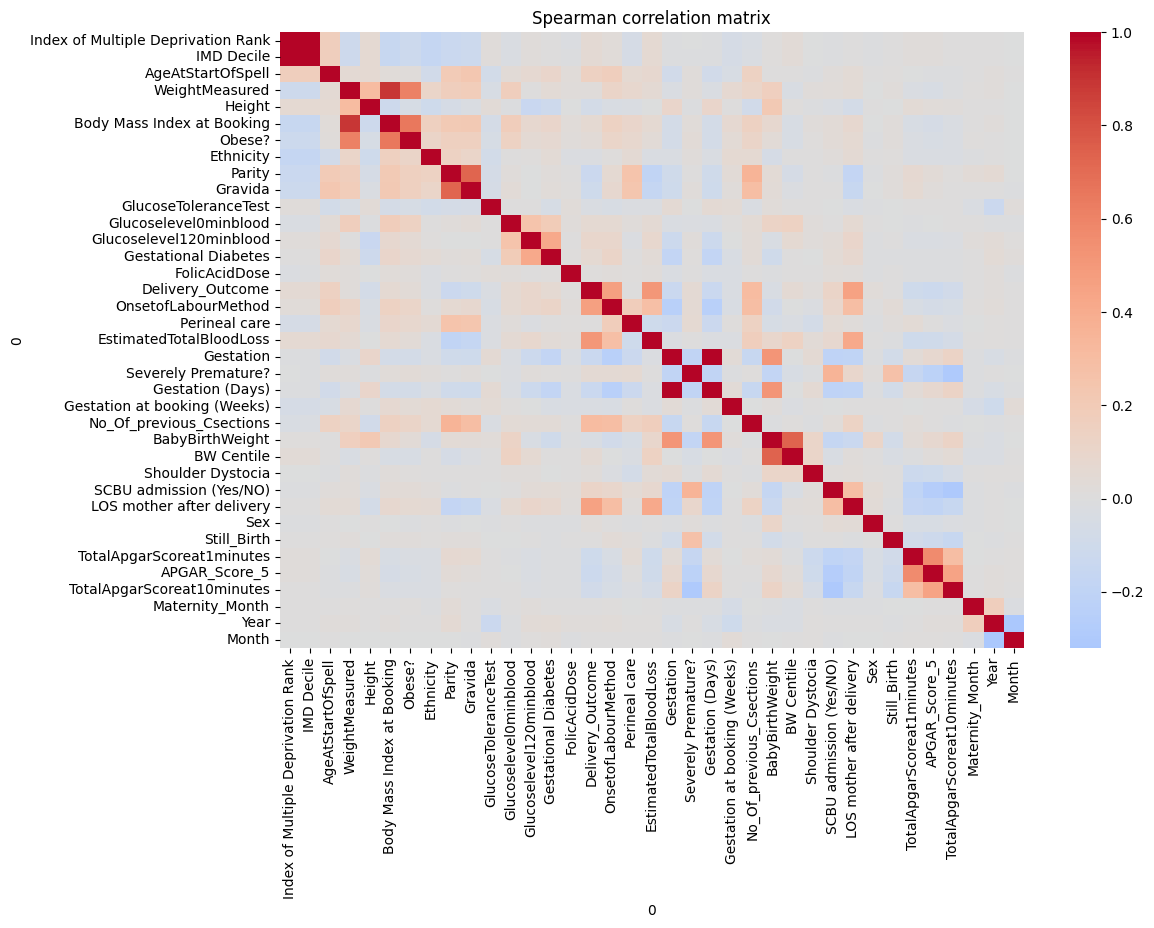

In [33]:
plt.figure(figsize=(12,8))
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Spearman correlation matrix")
plt.show()

We should keep baseline features only:

- Demographics: AgeAtStartOfSpell, Ethnicity, IMD Decile

- Anthropometrics: Body Mass Index at Booking, Obese?

- History: Parity, Gravida, No_Of_previous_Csections

- Booking measures: FolicAcidDose, GlucoseToleranceTest

=> Drop outcome-related variables (e.g., BabyBirthWeight, Delivery_Outcome, LOS mother, Still_Birth, SCBU admission, Apgar scores) — they leak future info.

In [34]:
columns_to_keep = ["AgeAtStartOfSpell", "Ethnicity", "IMD Decile", "Body Mass Index at Booking", "Obese?", "Parity", "Gravida", "No_Of_previous_Csections", "FolicAcidDose", "GlucoseToleranceTest", "Gestational Diabetes"]
df = df[columns_to_keep]


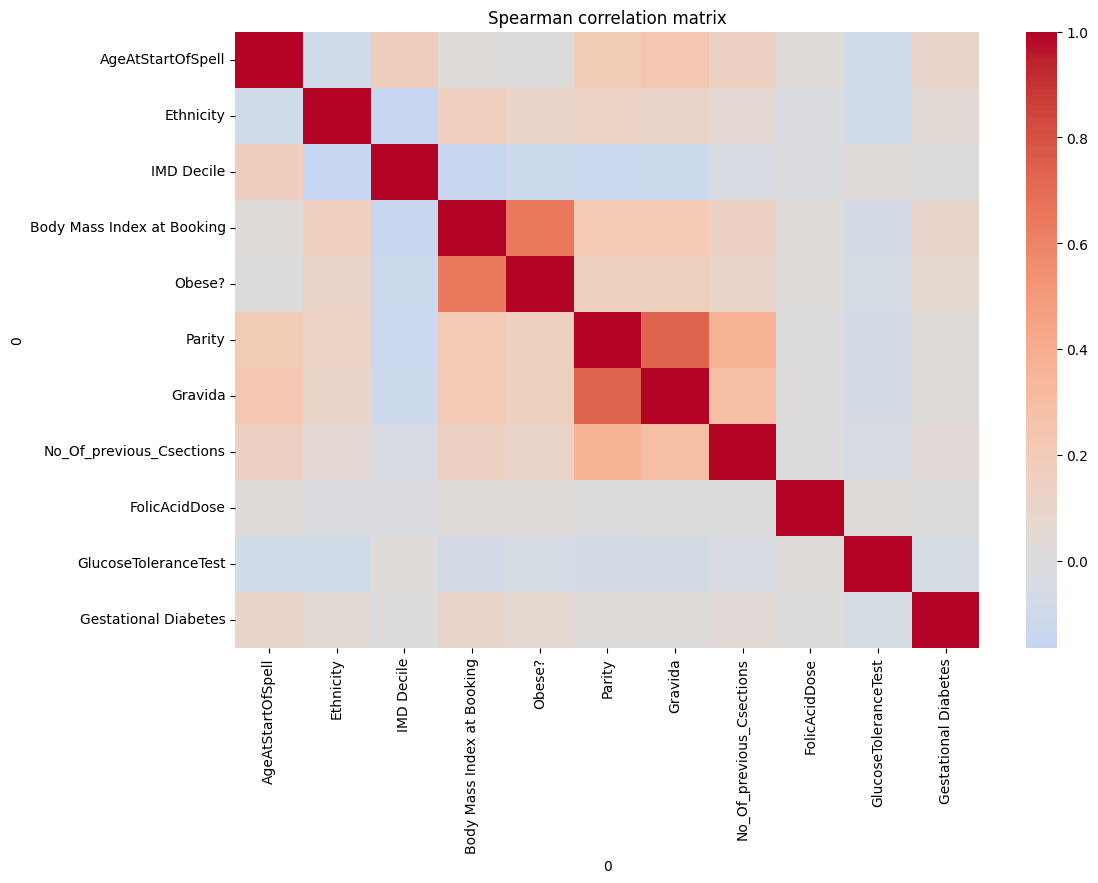

In [35]:
plt.figure(figsize=(12,8))
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Spearman correlation matrix")
plt.show()

## Box plots

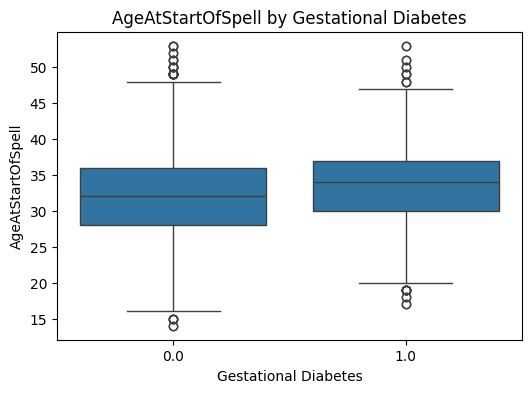

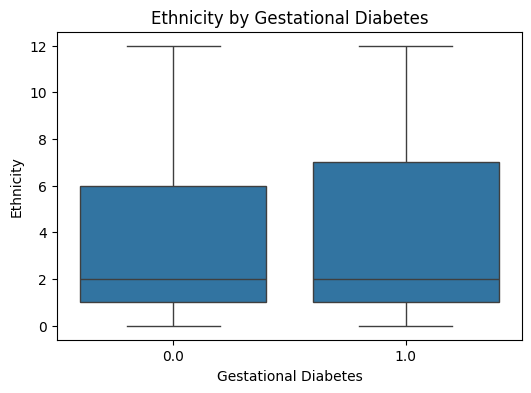

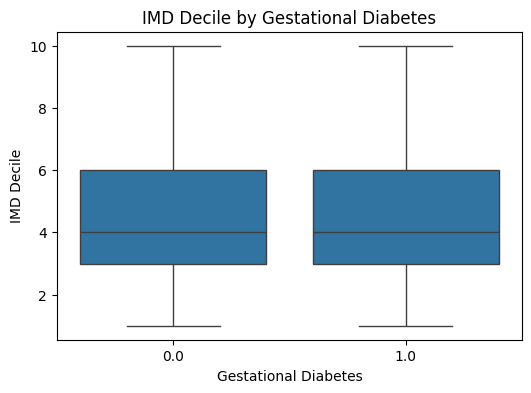

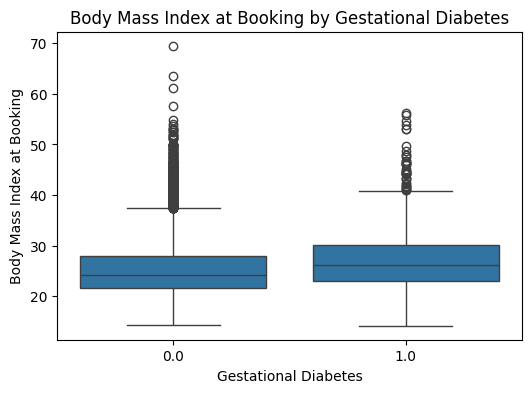

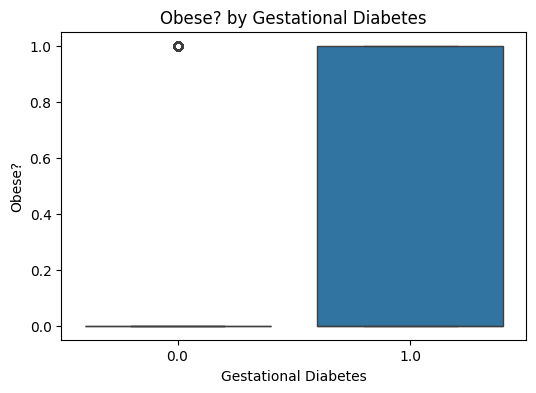

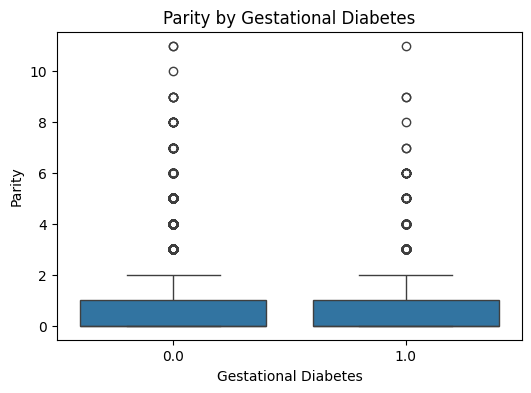

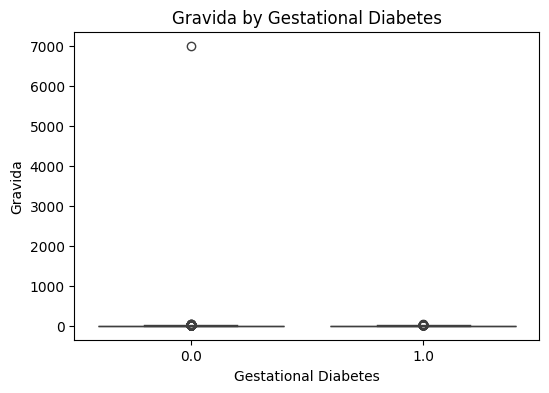

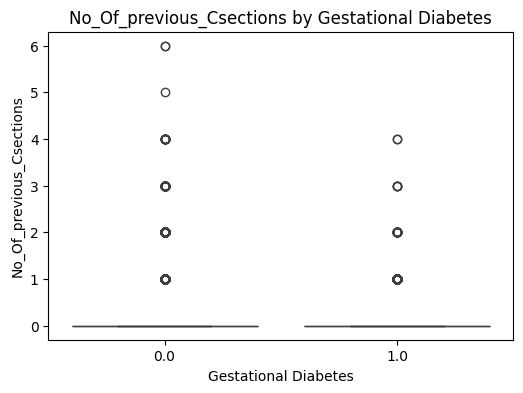

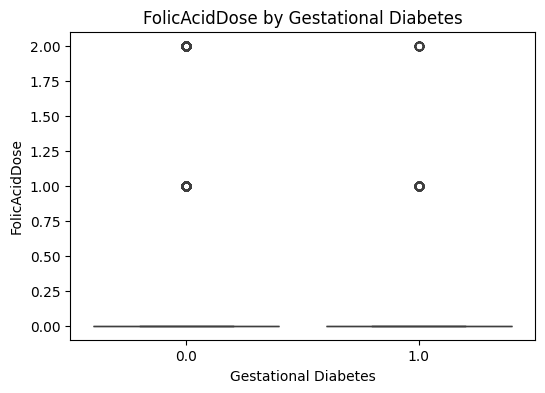

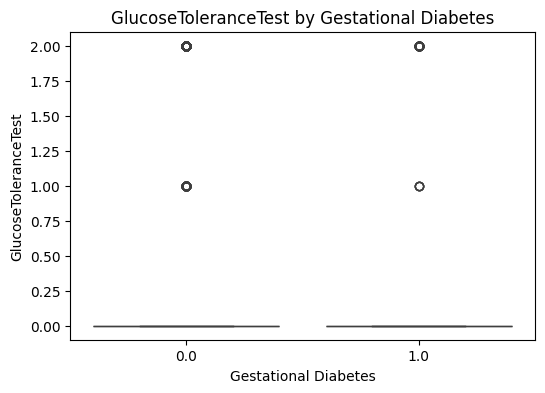

In [36]:
target = 'Gestational Diabetes'
for col in columns_to_keep[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} by {target}")
    plt.xlabel("Gestational Diabetes")
    plt.ylabel(col)
    plt.show()


=> We should remove the row that exhibits a Gravida equal to 7000 (it's an outlier).

In [37]:
# Drop the row that exhibits a Gravida equal to 7000
df = df.drop(df[df["Gravida"] >= 7000].index)
df.head(10)

,AgeAtStartOfSpell,Ethnicity,IMD Decile,Body Mass Index at Booking,Obese?,Parity,Gravida,No_Of_previous_Csections,FolicAcidDose,GlucoseToleranceTest,Gestational Diabetes
0,30.0,0,7.0,31.88,1.0,0.0,1.0,0.0,0,0,0.0
1,29.0,1,6.0,30.41,1.0,0.0,1.0,0.0,0,0,0.0
2,22.0,0,2.0,23.17,0.0,0.0,1.0,0.0,0,1,0.0
3,31.0,2,3.0,17.30,0.0,0.0,1.0,0.0,0,2,0.0
4,24.0,0,5.0,18.57,0.0,0.0,1.0,0.0,0,2,0.0
5,36.0,3,6.0,21.67,0.0,0.0,2.0,0.0,0,0,0.0
6,39.0,0,7.0,19.29,0.0,0.0,1.0,0.0,0,0,0.0
7,31.0,4,2.0,28.62,0.0,2.0,3.0,0.0,0,0,0.0
8,28.0,1,3.0,22.11,0.0,1.0,2.0,1.0,0,0,0.0
9,20.0,5,5.0,34.95,1.0,0.0,2.0,0.0,0,0,0.0


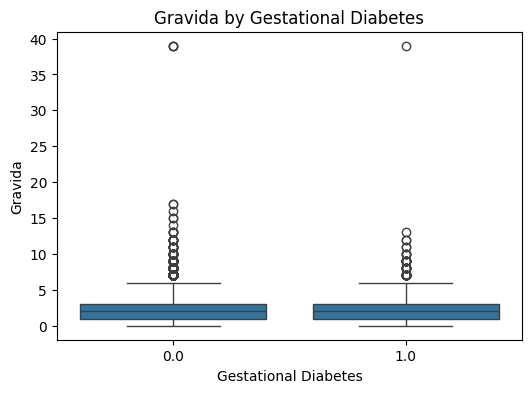

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=target, y="Gravida", data=df)
plt.title(f"Gravida by {target}")
plt.xlabel("Gestational Diabetes")
plt.ylabel("Gravida")
plt.show()

In [39]:
df.isnull().sum()

0
AgeAtStartOfSpell             0
Ethnicity                     0
IMD Decile                    0
Body Mass Index at Booking    0
Obese?                        0
Parity                        0
Gravida                       0
No_Of_previous_Csections      0
FolicAcidDose                 0
GlucoseToleranceTest          0
Gestational Diabetes          0
dtype: int64

Now, we will standardize our dataframe to stabilize the training and help the optimizer converge.

We will use the standard scaler to standardize the continuous features:
- AgeAtStartOfSpell
- IMD Decile 
- Body Mass Index at Booking
- Parity
- Gravida 

In [40]:
cols_to_standardize = ["AgeAtStartOfSpell", "IMD Decile", "Body Mass Index at Booking", "Parity", "Gravida"]

scaler = RobustScaler()
scaled = scaler.fit_transform(df[cols_to_standardize])

# Shift so everything is >= 0
scaled = scaled - scaled.min(axis=0) + 1e-6  
df[cols_to_standardize] = scaled

In [41]:
df.isnull().sum()

0
AgeAtStartOfSpell             0
Ethnicity                     0
IMD Decile                    0
Body Mass Index at Booking    0
Obese?                        0
Parity                        0
Gravida                       0
No_Of_previous_Csections      0
FolicAcidDose                 0
GlucoseToleranceTest          0
Gestational Diabetes          0
dtype: int64

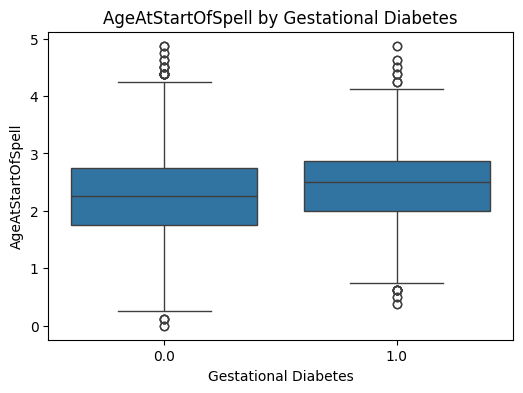

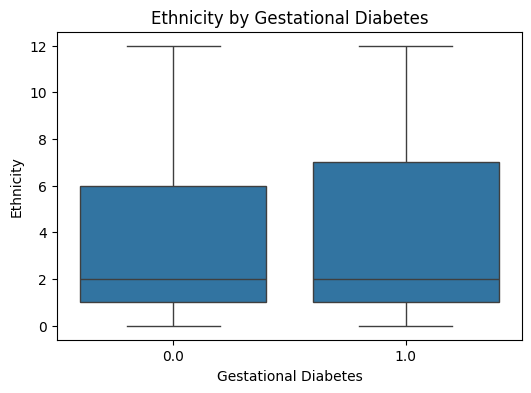

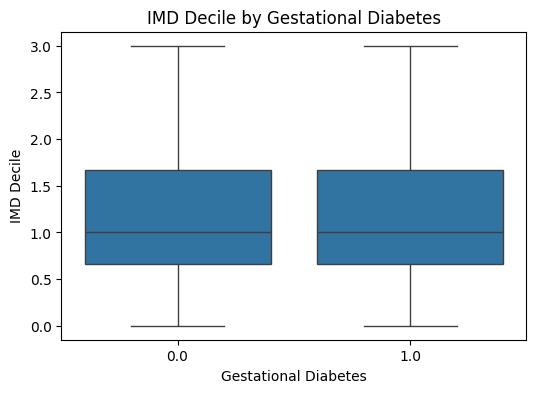

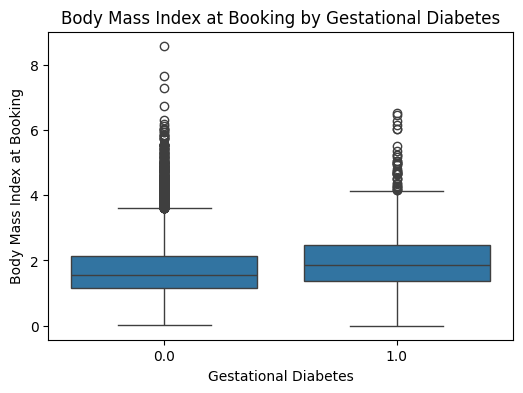

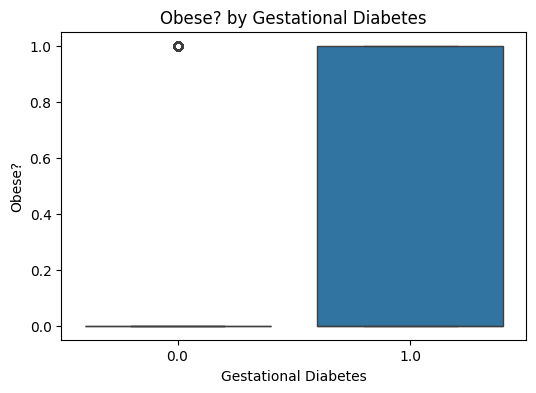

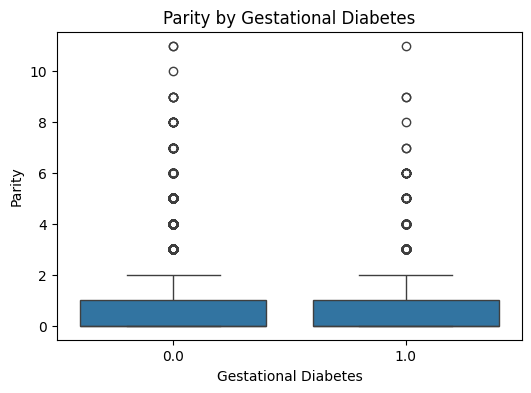

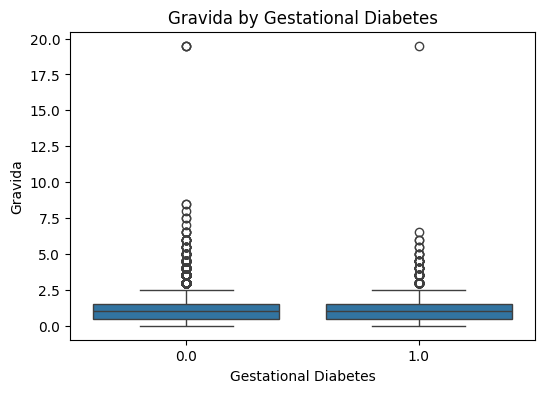

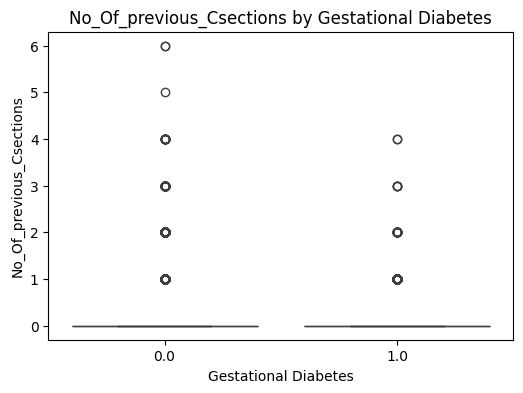

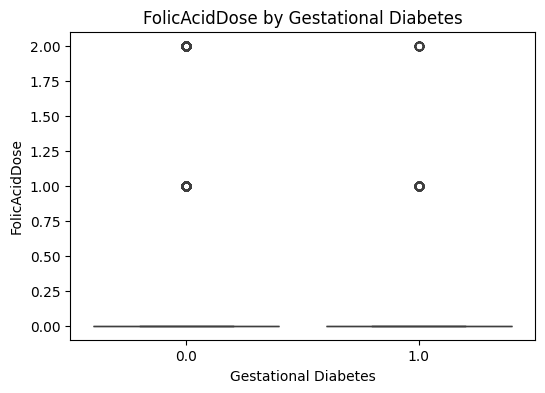

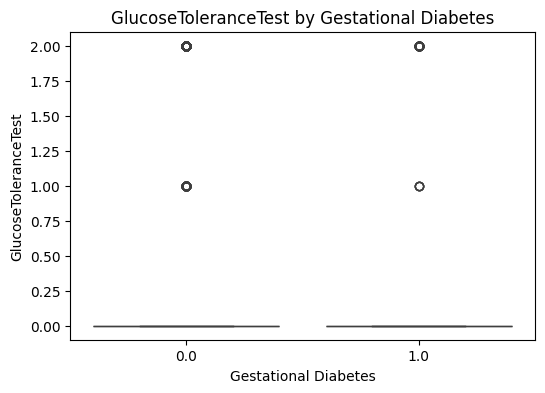

In [42]:
for col in columns_to_keep[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} by {target}")
    plt.xlabel("Gestational Diabetes")
    plt.ylabel(col)
    plt.show()

=> Perfect. Now let's save the dataframe for training. 

In [43]:
df.to_csv("./GDM_dataset.csv", index=False)